In [1]:
import os
import pandas as pd
from pathlib import Path

from arcgis.gis import GIS
from arcgis.learn import RetinaNet, prepare_data

In [2]:
gis = GIS('home')

In [3]:
training_data = gis.content.get('ccaa060897e24b379a4ed2cfd263c15f')
training_data

<Item title:"vehicle_detection_and_tracking" type:Image Collection owner:api_data_owner>

In [4]:
filepath = training_data.download(file_name=training_data.name)

In [5]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [6]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [7]:
data = prepare_data(data_path, 
                    batch_size=4, 
                    dataset_type="PASCAL_VOC_rectangles", 
                    chip_size=480)

In [8]:
data.classes

['background',
 'bicycle',
 'bus',
 'car',
 'motorcycle',
 'person',
 'scooter',
 'tempo',
 'tractor',
 'truck',
 'van']

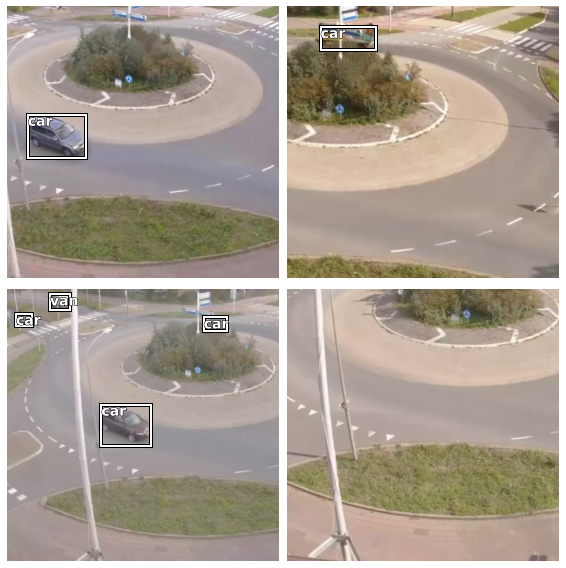

In [9]:
data.show_batch()

In [10]:
retinanet = RetinaNet(data)

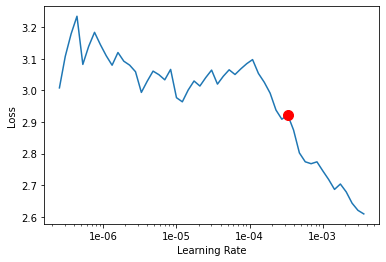

In [11]:
# Find optimal learning rate
lr = retinanet.lr_find()

In [12]:
# Print optimal learning rate
lr 

0.0003311311214825911

In [13]:
# Train model for X epochs
retinanet.fit(100, lr=lr, tensorboard=True)

Monitor training on Tensorboard using the following command: 'tensorboard --host=DESKTOP-913SL67 --logdir="C:\Users\ianro\AppData\Local\Temp\vehicle_detection_and_tracking\training_log"'


epoch,train_loss,valid_loss,average_precision,time
0,2.919188,3.183630,0.000000,00:19
1,2.443756,5.452451,0.023772,00:19
2,2.024640,6.111564,0.034397,00:18
3,1.710843,2.574275,0.032358,00:18
4,1.548694,2.178090,0.033063,00:18
5,1.312768,2.159975,0.036030,00:18
6,1.320703,1.806790,0.045415,00:19
7,1.163852,1.508286,0.070679,00:18
8,1.093802,1.354071,0.117476,00:17
9,0.978117,1.195521,0.070482,00:17


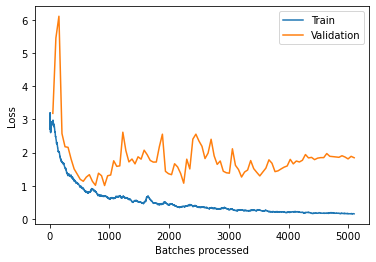

In [14]:
# Plot the training and validation losses
retinanet.learn.recorder.plot_losses()

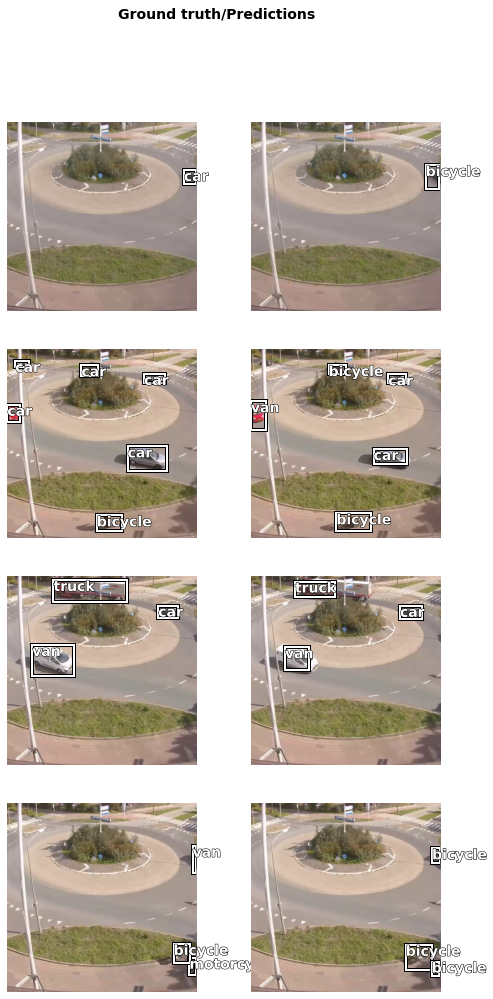

In [15]:
# Show ground truth -> model predictions
retinanet.show_results(thresh=0.4)

In [16]:
retinanet.average_precision_score(detect_thresh=0.4)

{'bicycle': 0.5700483065512447,
 'bus': 0.0,
 'car': 0.6709205002797458,
 'motorcycle': 0.0,
 'person': 0.0,
 'scooter': 0.0,
 'tempo': 0.0,
 'tractor': 0.0,
 'truck': 0.6666666865348816,
 'van': 0.2424242568738535}

In [17]:
all_classes = []
for i, bb in enumerate(data.train_ds.y):
    all_classes += bb.data[1].tolist()
    
df = pd.value_counts(all_classes, sort=False)
df.index = [data.classes[i] for i in df.index] 
df

bicycle       267
bus            23
car           747
motorcycle     32
person         26
scooter         7
tempo           1
tractor         3
truck          29
van            75
dtype: int64